# Tides, Rain and River Flow

This example notebook illustrates how to open and analyze the Tides Rain and Riverflow dataset, which is stored in the Data Library data repository at:

    https://data.sandiegodata.org/dataset/sandiegodata-org-tides_rain_river
    

To get a good initial understanding of this dataset, you should see the [EDA notebook](https://github.com/san-diego-water-quality/water-datasets/blob/master/derived/sandiegodata.org-tides_rain_river/notebooks/eda-tides_river_rain.ipynb) for the data package. 

The first step will be to load the dataset with Metapack. Be sure you have metapack installed ( ``pip install metapack`` ) then visit the link above and look for the usage code under 'Loading the ZIP Package'.  



In [1]:
import metapack as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-tides_rain_river-5.zip')

In [3]:
pkg

The References are the datasets that were used to create this data package, and the Resoruces are the ones we can load from the data package. 

In [7]:
pkg.resource('tides_river_rain')

Header,Type,Description
date,date,date
discharge_rate,number,"Discharge rate, in cubic feet per second, for the San Diego River at Fashion Valley"
recent_total_discharge,number,Rolling three day sum of discharge_rate
recent_max_discharge,number,Rolling three day max of discharge_rate
dailyprecip,string,"Daily precipitation, in inches, at Lindberg Field"
recent_precip,number,Rolling three day sum of dailyprecip
wl_max,string,"Max ocean water level, in feet, at La Jolla"
wl_min,string,"Min water level, in feet, at La Jolla"


In [12]:
trr = pkg.resource('tides_river_rain').read_csv(parse_dates=True)
trr.head()

,date,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min
0,1988-01-01,22.0,22.0,22.0,NaN,NaN,NaN,NaN
1,1988-01-02,20.0,42.0,42.0,NaN,NaN,NaN,NaN
2,1988-01-03,18.0,60.0,60.0,NaN,NaN,NaN,NaN
3,1988-01-04,18.0,56.0,60.0,NaN,NaN,NaN,NaN
4,1988-01-05,21.0,57.0,60.0,NaN,NaN,NaN,NaN


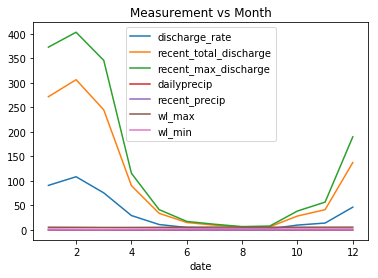

In [45]:
trr.groupby(trr.date.dt.month).mean().plot(title='Measurement vs Month')

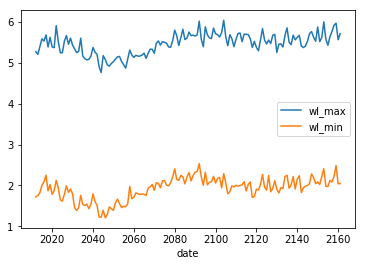

In [44]:
# Groupby a running month and take the average
trr.groupby(trr.date.dt.month*12+trr.date.dt.year)['wl_max','wl_min'].mean().plot()

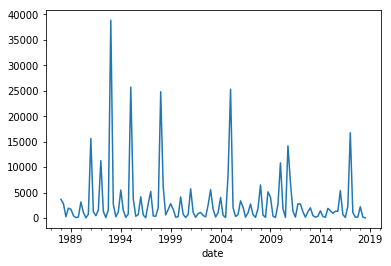

In [51]:
# Similar idea to the last cell, but using the resample function to 
# compute sums by quarter. 
trr.set_index('date').resample('1q').sum().discharge_rate.plot()